In [1]:
from utils.LLM import RetrievalWithPrompt, IsGenerationalRequest, GenerateDescriptions, GenerateStyle, StyleCommandDistinguisher, ultimate_refiner

/Users/vincent/Projects/專四下/進階AI課程/Prompt_Tuning_Stable_Diffusion/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/vincent/Projects/專四下/進階AI課程/Prompt_Tuning_Stable_Diffusion/venv/lib/python3.9/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
# mode: 1=>remote sever 2=>local server
retriever = RetrievalWithPrompt(mode=2) 

/Users/vincent/Projects/專四下/進階AI課程/Prompt_Tuning_Stable_Diffusion/venv/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
retriever.invoke("a cat")

[Document(page_content='a mix between a cat and a dog', metadata={'url': 'https://image.lexica.art/full_jpg/05058511-9713-4fa3-a56a-9d7e50fda8f1', 'source_site': 'lexica.art'}),
 Document(page_content='a mix of dog and cat', metadata={'url': 'https://image.lexica.art/full_jpg/2d7cb7ce-69fd-4da7-a3d8-79fc3821ed9f', 'source_site': 'lexica.art'}),
 Document(page_content='Cat with human feet', metadata={'url': 'https://image.lexica.art/full_jpg/007078fb-1faa-4749-807a-ea385acf50cb', 'source_site': 'lexica.art'}),
 Document(page_content='A cat wird red Skin', metadata={'url': 'https://image.lexica.art/full_jpg/27669c62-a5e5-47c2-808c-76f1871b4047', 'source_site': 'lexica.art'}),
 Document(page_content='fluffy white cat', metadata={'url': 'https://image.lexica.art/full_jpg/33b2ccfa-fc76-45ea-aa96-c4ab30bc8dee', 'source_site': 'lexica.art'})]

In [4]:
judge = IsGenerationalRequest()
judge.invoke("a cat run on the street")

{'result': 'no'}

In [10]:
description_advisor = GenerateDescriptions()
ans1 = description_advisor.invoke("a cat is running on the street")["result"]
ans2 = description_advisor.invoke("A lion sitting on the chair")["result"]
ans3 = description_advisor.invoke("an aisin woman cooking")["result"]

print(len(ans1))
print(len(ans2))
print(len(ans3))


print(ans1)
print(ans2)
print(ans3)

3
3
3
['Midnight fur flying, whiskers twitching, a sleek black cat dashes across the rain-soaked pavement, neon streetlights casting an otherworldly glow.', "A whirlwind of orange and white fur, the cat's paws barely touching the ground as it weaves through puddles and discarded trash cans on the bustling city street.", 'In the midst of a drizzly evening, a tiny ball of fluff with piercing green eyes streaks down the sidewalk, its tail streaming behind like a banner as it chases an elusive firefly.']
["Majestic lion sprawled across velvet cushions, its tawny mane a fiery halo against the opulent room's rich tones.", 'In a whimsical twist, a regal lion perches atop a plush throne, its golden fur glistening like polished brass in the warm light of sunset.', 'A surreal scene unfolds as a majestic lion reclines on a vintage armchair, its whiskers twitching with gentle curiosity as it surveys its kingdom.']
['A petite Asian woman kneads dough in a worn wooden bowl, surrounded by wisps of st

In [11]:
# error_counter = 0
# empty_counter = 0

# for i in range(100):
#     try:
#         ans = description_advisor.invoke("a cat is running on the street")
#         # print(ans)
#         if ans == {}:
#             empty_counter += 1
#     except:
#         error_counter += 1

# print(f"empty_counter: {empty_counter}")
# print(f"error_counter: {error_counter}")

In [12]:
style_advisor = GenerateStyle()
print(style_advisor.invoke("a cat is running on the street"))

{'result': ['Realistic', 'Cartoonish', 'Impressionist', 'Minimalist', 'Surreal', 'Stylized']}


In [13]:
style_command_distinguisher = StyleCommandDistinguisher()
print(style_command_distinguisher.invoke("I want a preview of the style of Watercolor"))
print(style_command_distinguisher.invoke("I want to try out the style of anime"))
print(style_command_distinguisher.invoke("I want to see the final result"))
print(style_command_distinguisher.invoke("add the style of oil painting"))
print(style_command_distinguisher.invoke("anime"))
print(style_command_distinguisher.invoke("that's it"))
print(style_command_distinguisher.invoke("how it will look like in anime style"))


{'mode': 'preview', 'style': 'Watercolor'}
{'mode': 'add', 'style': 'anime'}
{'mode': 'final', 'style': ''}
{'mode': 'add', 'style': 'oil painting'}
{'mode': 'add', 'style': 'anime'}
{'mode': 'final', 'style': ''}
{'mode': 'add', 'style': 'anime'}


In the warm haze of evening, Mei's slender figure is silhouetted against the soft glow of the refrigerator, her hands moving deftly among sizzling ingredients in a symphony of culinary creation.
A hyper-realistic depiction of Mei, a cute young Asian woman, cooking in the kitchen during the warm evening haze, her slender figure silhouetted against the soft glow of the refrigerator as she expertly manipulates sizzling ingredients.
Model: sd_xl_base_1.0.safetensors [31e35c80fc]
{'prompt': 'A hyper-realistic depiction of Mei, a cute young Asian woman, cooking in the kitchen during the warm evening haze, her slender figure silhouetted against the soft glow of the refrigerator as she expertly manipulates sizzling ingredients. <lora:lcm_lora_sdxl:1>', 'negative_prompt': 'deform, ugly', 'styles': [], 'sampler_name': 'LCM', 'batch_size': 1, 'steps': 6, 'cfg_scale': 1, 'width': 1024, 'height': 1024, 'sampler_index': 'LCM'}
Time: 15.27s


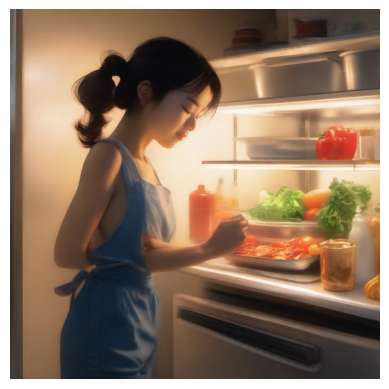

Model: sd_xl_base_1.0.safetensors [31e35c80fc]
{'prompt': 'hyper realistic, a cute young asian woman cooking in the kitchen <lora:lcm_lora_sdxl:1>', 'negative_prompt': 'deform, ugly', 'styles': [], 'sampler_name': 'LCM', 'batch_size': 1, 'steps': 6, 'cfg_scale': 1, 'width': 1024, 'height': 1024, 'sampler_index': 'LCM'}
Time: 15.36s


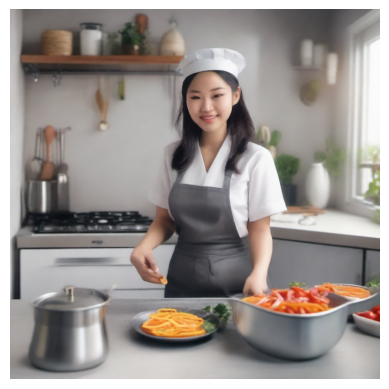

(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 15.356902122497559)

In [44]:
from utils.LLM import RetrievalWithPrompt, IsGenerationalRequest, GenerateDescriptions, GenerateStyle, StyleCommandDistinguisher, ultimate_refiner
from util_txt2img import txt2img
ultimate_refiner = ultimate_refiner()
base_prompt = "a cute young asian woman cooking in the kitchen"
style="hyper realistic"
GenerateDescriptions = GenerateDescriptions()
description = GenerateDescriptions.invoke(base_prompt)["result"][2]
print(description)
final_prompt = ultimate_refiner.invoke(base_prompt=base_prompt, style=style, description=description)["result"]
print(final_prompt)
txt2img(final_prompt, to_show=True)
txt2img(f"{style}, {base_prompt}", to_show=True)



nice prompt:
base_prompt = "stone shapped hotel units on the beach"
style="Impressionism"

